Sleep efficiency EDA
The dataset collects people's sleep data and life habit.

-Age

-Smoking

-REM Sleep 快速動眼, Light Sleep 淺睡, Deep Sleep 深睡

-Exercise

-Alcohol 酒精

-Caffeine consumption 咖啡因攝取量

-Awakenings: number of time wake up during the night

We will analyze how those factors affect sleep efficiency.
Does most people have high/low sleep efficient?
What is most people's sleep habit (When go to bed? When wake up?)

#Import library

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
sns.set(color_codes=False)
import warnings
warnings.filterwarnings('ignore')

#Load data

In [219]:
df=pd.read_csv(r"Sleep_Efficiency.csv")

In [220]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [221]:
df.shape

(452, 15)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [223]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


#Handle missing value

In [224]:
#Check missing value
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [225]:
#Fill nan values with median

df["Awakenings"] = df["Awakenings"].fillna(df["Awakenings"].median())
df["Caffeine consumption"] = df["Caffeine consumption"].fillna(df["Caffeine consumption"].median())
df["Alcohol consumption"] = df["Alcohol consumption"].fillna(df["Alcohol consumption"].median())
df["Exercise frequency"] = df["Exercise frequency"].fillna(df["Exercise frequency"].median())

In [226]:
#check missing value again, no missing value
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

#Convert data type

In [227]:
df["Bedtime"] = pd.to_datetime(df["Bedtime"])
df["Wakeup time"] = pd.to_datetime(df["Wakeup time"])
df["Awakenings"] = df["Awakenings"].astype("int")
df["Exercise frequency"] = df["Exercise frequency"].astype("int")

#Rename columns

In [228]:
df.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration':'Sleep_duration',"Sleep efficiency":"Sleep_efficiency",
                     "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
                     "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption":"Caffeine_consumption",
                     "Alcohol consumption":"Alcohol_consumption","Smoking status":"Smoking_status","Exercise frequency":"Exercise_frequency"}, inplace = True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    object        
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup_time             452 non-null    datetime64[ns]
 5   Sleep_duration          452 non-null    float64       
 6   Sleep_efficiency        452 non-null    float64       
 7   REM_sleep_percentage    452 non-null    int64         
 8   Deep_sleep_percentage   452 non-null    int64         
 9   Light_sleep_percentage  452 non-null    int64         
 10  Awakenings              452 non-null    int64         
 11  Caffeine_consumption    452 non-null    float64       
 12  Alcohol_consumption     452 non-null    float64   

In [230]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0,0.0,0.0,Yes,3
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3,0.0,3.0,Yes,3
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0.0,0.0,No,3
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3,50.0,5.0,Yes,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0.0,3.0,No,3


#Handle Outliner

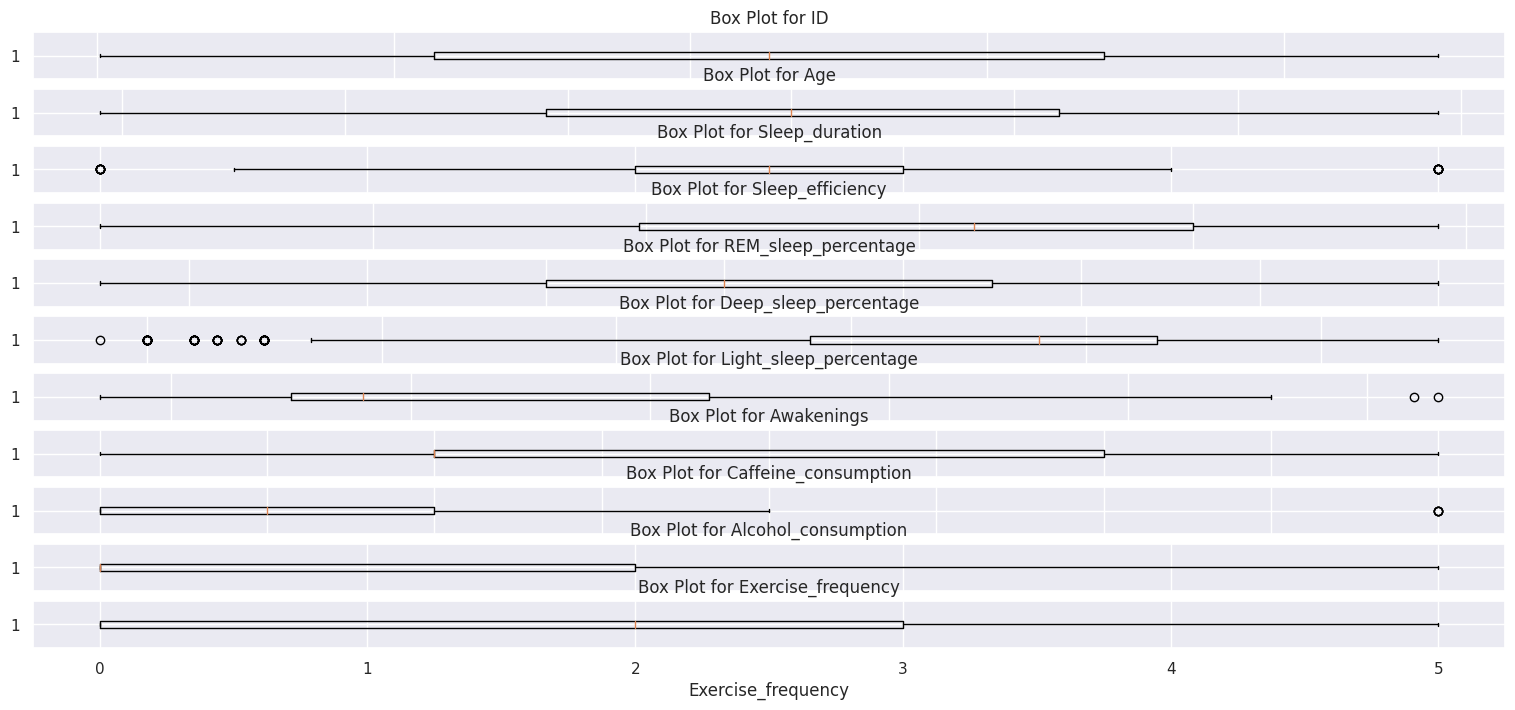

In [231]:
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(19, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i+1)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)

In [232]:
num_cols = ["Sleep_duration","Sleep_efficiency", "REM_sleep_percentage", "Deep_sleep_percentage", "Light_sleep_percentage", "Awakenings", "Caffeine_consumption", "Alcohol_consumption", "Exercise_frequency"]

In [233]:
Q1 = df[num_cols].quantile(0.2)
Q3 = df[num_cols].quantile(0.8)
IQR = Q3 - Q1
print("The shape of the dataframe before removing outliers is " + str(df.shape))
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("The shape of the dataframe after removing outliers is " + str(df.shape))

The shape of the dataframe before removing outliers is (452, 15)
The shape of the dataframe after removing outliers is (432, 15)


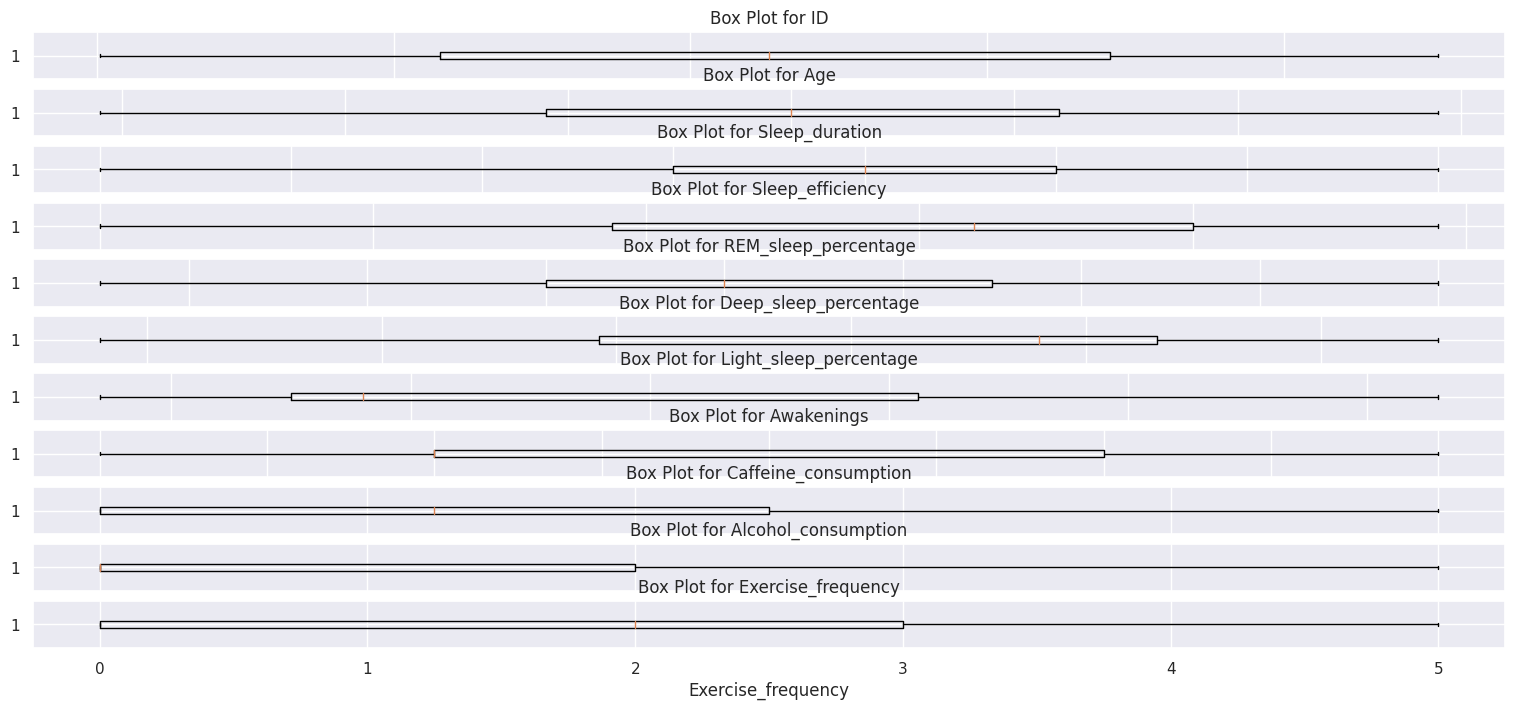

In [234]:
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(19, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i+1)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)

Outlier has been removed.

#Bivariate Analysis

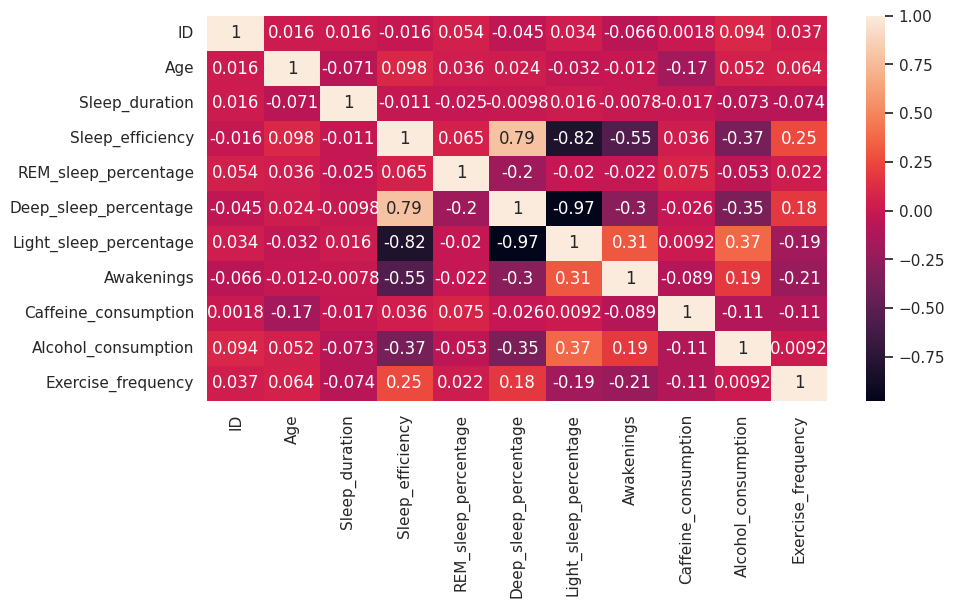

In [235]:
# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

#What is the sleep efficiency?

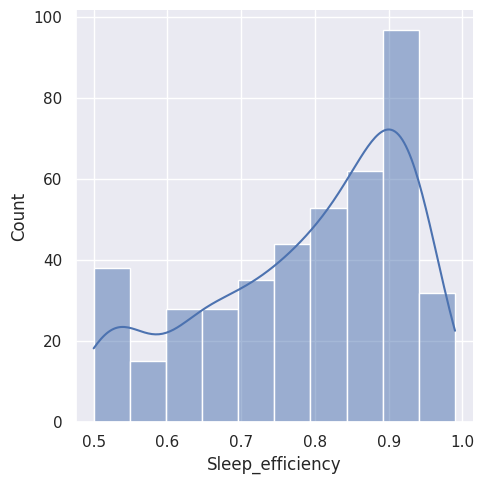

In [236]:
sns.displot(data=df, x='Sleep_efficiency', kde=True)

More than 100 people have high sleep efficiency with 0.9

#When go to sleep?

In [237]:
df['Dates'] = pd.to_datetime(df['Bedtime'], errors='coerce')
df['hours'] = (df['Dates']).dt.hour

In [238]:
df['hours'].value_counts()

0     102
22     83
21     69
1      65
2      60
23     53
Name: hours, dtype: int64

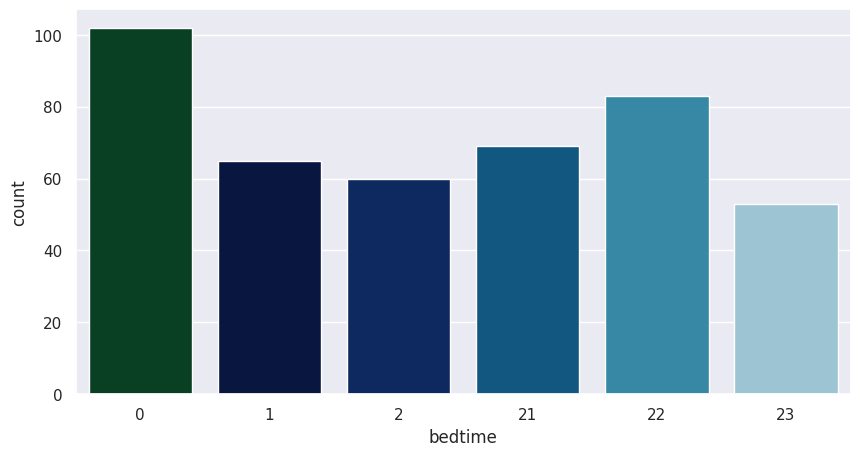

In [239]:
fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.countplot(data=df, x="hours", palette="ocean")
plt.xlabel('bedtime')
plt.show()

In general, most people sleep at 0am.

When wake up?

In [240]:
df['Datew'] = pd.to_datetime(df['Wakeup_time'], errors='coerce')
df['hourw'] = (df['Datew']).dt.hour

In [241]:
df['hourw'].value_counts()

7     76
5     75
9     73
6     63
8     60
4     39
10    31
3     10
11     5
Name: hourw, dtype: int64

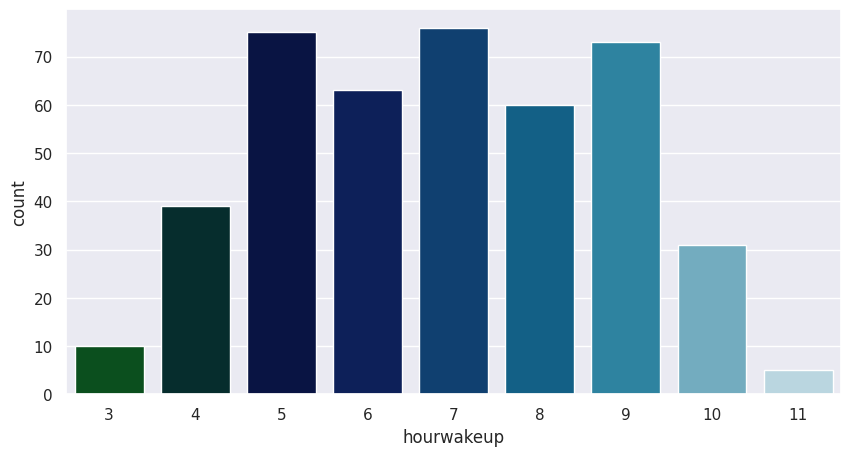

In [242]:
fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.countplot(data=df, x="hourw", palette="ocean")
plt.xlabel('hourwakeup')
plt.show()

Most people wake up at 5am and 7am

#How many sleeping hours?

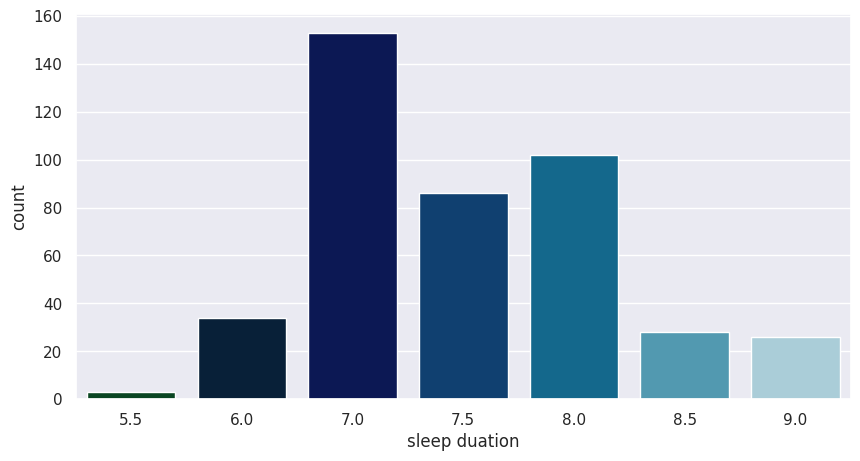

In [243]:
fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.countplot(data=df, x="Sleep_duration", palette="ocean")
plt.xlabel('sleep duation')
plt.show()

Most of people sleep 7 hours.

# Is there a relationship between age, gender and sleep efficiency?

In [244]:
df.Gender.value_counts()

Female    216
Male      216
Name: Gender, dtype: int64

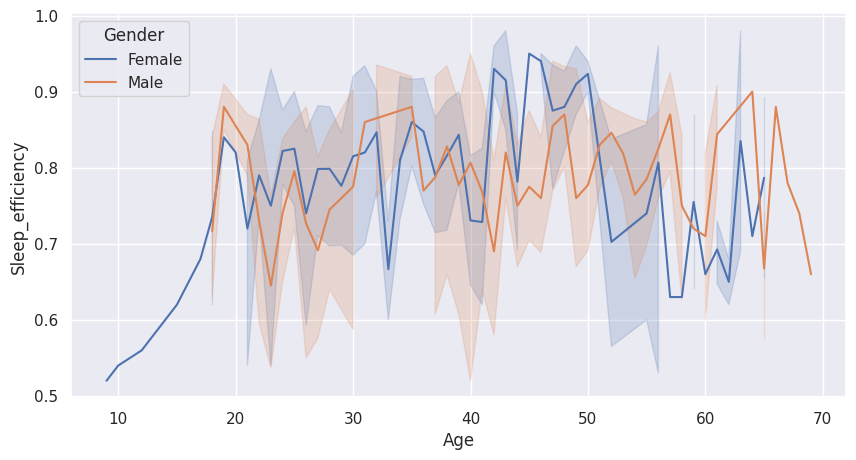

In [245]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="Age", y="Sleep_efficiency", hue="Gender")
plt.show()

lowest sleep efficiency:

For male: Age between 20-30.
For female Age between 55-65.

highest sleep efficiency:

For male: Age between 60-65.
For female: Age between 40-50.

# Does smoking affect sleep patterns?

In [246]:
df.Smoking_status.value_counts()

No     287
Yes    145
Name: Smoking_status, dtype: int64

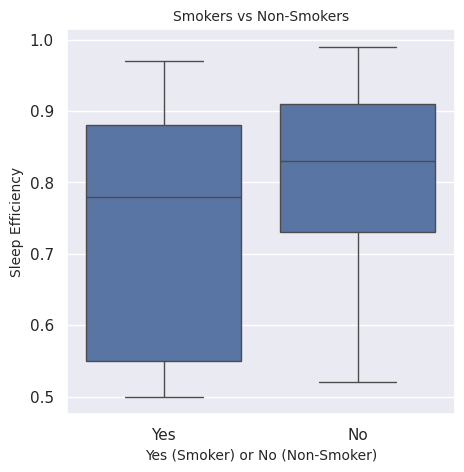

In [247]:
fig, axes = plt.subplots(1,1, figsize=(5, 5))
sns.boxplot(data=df,x="Smoking_status",y="Sleep_efficiency")
plt.xlabel("Yes (Smoker) or No (Non-Smoker)",fontsize=10)
plt.ylabel("Sleep Efficiency",fontsize=10)
plt.title("Smokers vs Non-Smokers",fontsize=10)
plt.show()

It shows that non-smokers have better sleep quality compare to smokers.

#Is there a relationship between Deep sleep %, Light sleep %, REM sleep %, and Sleep efficiency?

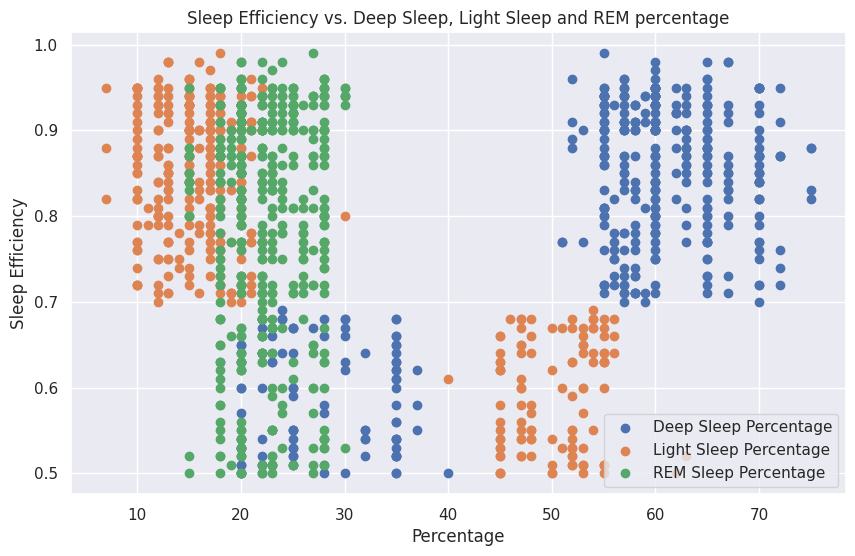

In [248]:
plt.figure(figsize=(10, 6))
plt.scatter('Deep_sleep_percentage', 'Sleep_efficiency', label='Deep Sleep Percentage',data=df)
plt.scatter('Light_sleep_percentage', 'Sleep_efficiency', label='Light Sleep Percentage',data=df)
plt.scatter('REM_sleep_percentage', 'Sleep_efficiency', label='REM Sleep Percentage',data=df)
plt.xlabel('Percentage')
plt.ylabel('Sleep Efficiency')
plt.legend()
plt.title('Sleep Efficiency vs. Deep Sleep, Light Sleep and REM percentage')
plt.show()

More Deep sleep % will have higher sleep efficiency. (Positive)
More Light sleep % will have lower sleep efficiency.(Negative)
Most people has 20-30% REM sleep. REM sleep does not affect on sleep efficiency.(No effect)

#Does Exercise affect Sleep Efficiency?

In [249]:
df.Exercise_frequency.value_counts()

3    124
0    112
1     92
2     55
4     41
5      8
Name: Exercise_frequency, dtype: int64

<Axes: xlabel='Age', ylabel='Exercise_frequency'>

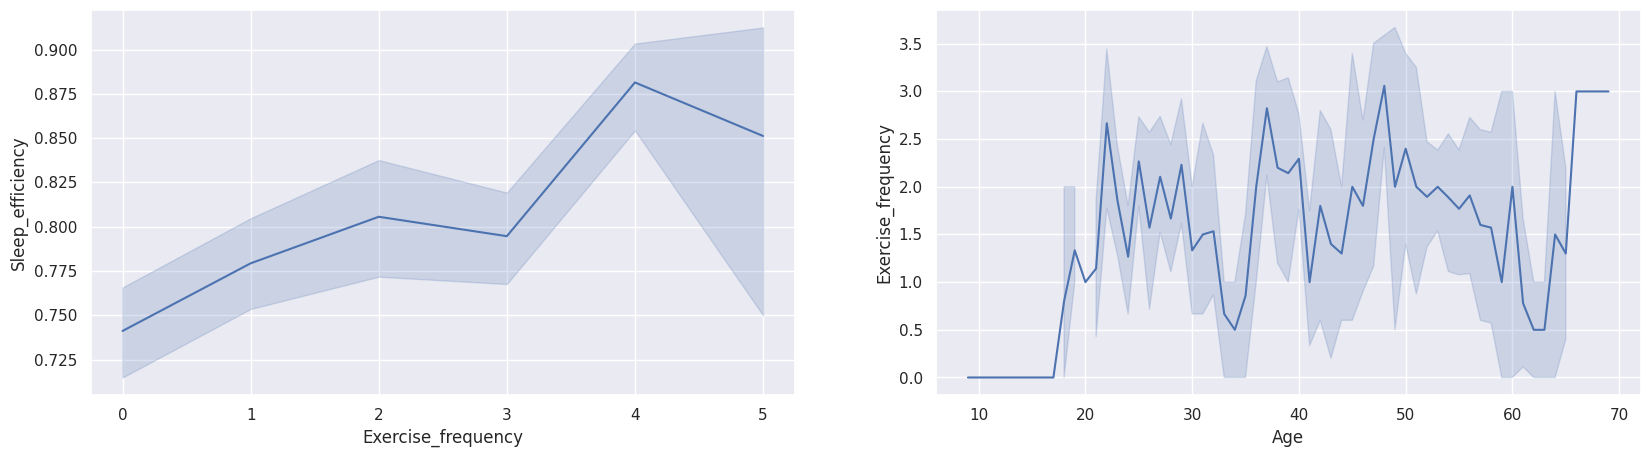

In [271]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.lineplot(x="Exercise_frequency", y="Sleep_efficiency", data=df, ax=axes[0])
sns.lineplot(x="Age",y="Exercise_frequency", data=df, ax=axes[1])

In general, doing more exercise will get better sleep efficiency.

#What is the effect of drinking Alcohol on Sleep Efficiency?

In [251]:
df.Alcohol_consumption.value_counts()

0.0    247
1.0     50
3.0     48
2.0     37
5.0     30
4.0     20
Name: Alcohol_consumption, dtype: int64

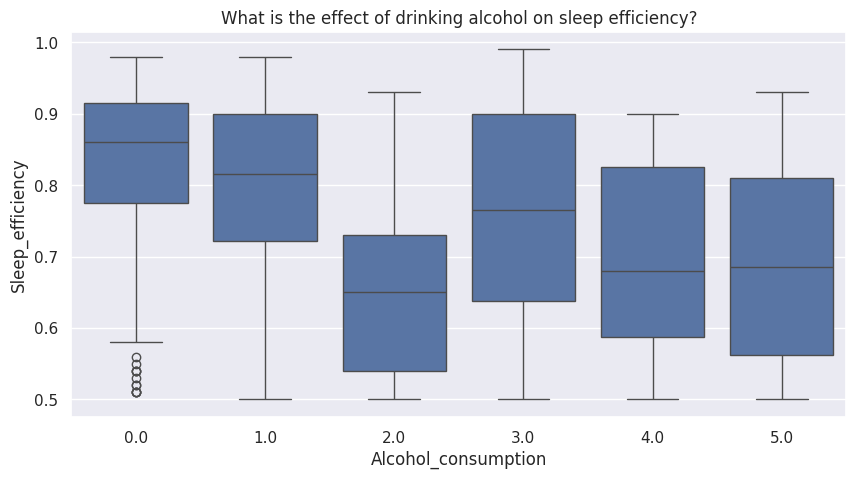

In [252]:
fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(data=df,x="Alcohol_consumption",y="Sleep_efficiency")
plt.title("What is the effect of drinking alcohol on sleep efficiency?")
plt.show()

#Does Caffeine consumption affect Sleep Efficiency?

In [253]:
df.Caffeine_consumption.value_counts()

0.0      205
50.0     102
25.0     100
75.0      24
100.0      1
Name: Caffeine_consumption, dtype: int64

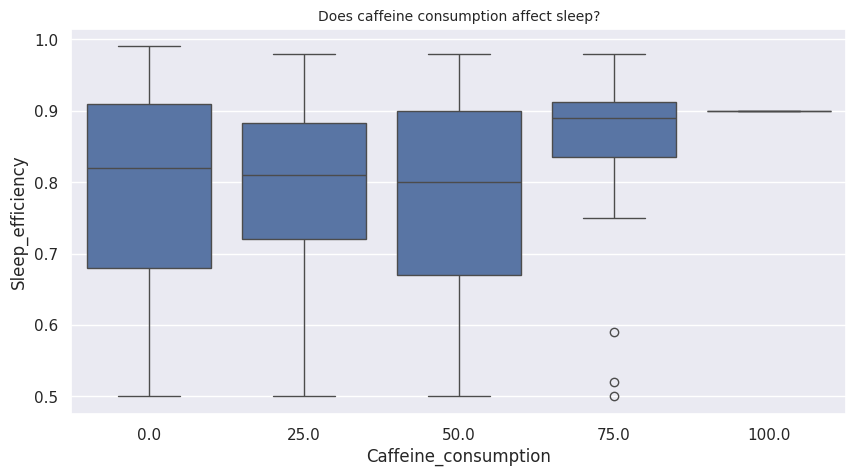

In [254]:
fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(data=df,x="Caffeine_consumption",y="Sleep_efficiency")
plt.title("Does caffeine consumption affect sleep?",fontsize=10)
plt.show()

Taking caffeine has no effect on sleep efficiency.

In [255]:
df.Awakenings.value_counts()

1    165
0     91
3     62
4     61
2     53
Name: Awakenings, dtype: int64

Usually the number of awakenings is 1 or 0.

In [256]:
df.Deep_sleep_percentage.value_counts()

60    66
65    41
55    41
57    34
70    34
35    27
58    25
63    20
67    17
25    17
20    16
22    12
56     9
62     9
72     8
23     8
30     7
59     7
32     6
28     6
75     4
24     4
52     4
37     3
51     2
53     2
27     1
18     1
40     1
Name: Deep_sleep_percentage, dtype: int64

#Does the number of times you wake up while sleeping have an effect on deep sleep?

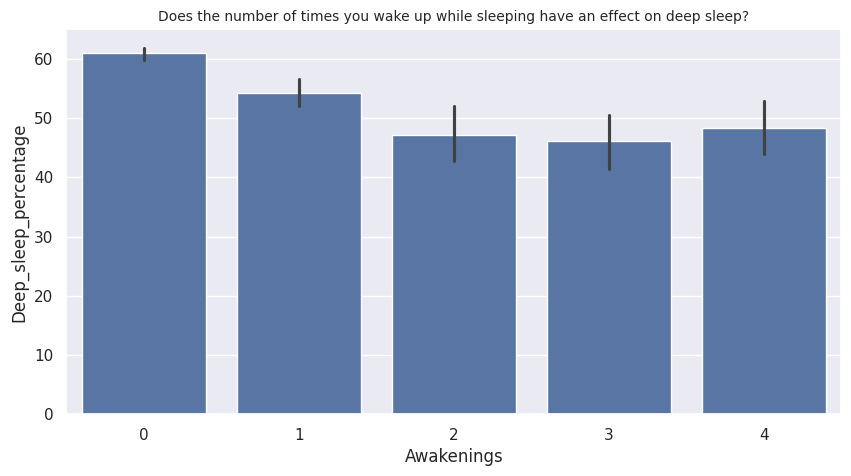

In [257]:
fig, axes = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(data=df,x="Awakenings",y="Deep_sleep_percentage")
plt.title("Does the number of times you wake up while sleeping have an effect on deep sleep?",fontsize=10)
plt.show()

The quality of sleep decreases with each waking up.